# Derivatives of trigonometric functions

Welcome back to our exploration of derivatives. In my last article we looked at the physical intuition behind the derivative of a polynomial function — $f(x)=x^2-2$ and to close out our discussion we decided to expand our horizons and try our hand at working out the derivative of a trigonometric function.

*Motivation*: Given a trigonometric function like $f(x)=sin(x)$ we’d like to be able to find it’s derivative. Let’s begin!

## Hello limits, my old friend...
Firstly, let’s revisit the idea behind the derivative of a function. Given a function $f(x)=sin(x)$ we'd like to know how the value of the output of the function $f(x)$ changes relative to a change in the value of the input to the function, in this case $x$:

$$\frac{\Delta{f(x)}}{\Delta{x}}\equiv{\frac{f(x+\epsilon)-f(x)}{(x+\epsilon)-x}}$$

Next we let the value of $\epsilon$ tend to zero (which we denoted as: $\epsilon\rightarrow0$) and we reasoned about the value of the ratio $\frac{\Delta{f(x)}}{\Delta{x}}$. When doing this, what we're actually thinking about is called the *limit of the function $f(x)$*:

$$\lim_{\epsilon\to0}\frac{\Delta{f(x)}}{\Delta{x}}\to?$$

If we can find the value of the *limit* of our function, then we will have found a way to compute the *gradient* or *slope* of the function at any given point. This in fact is the derivative of the function and it's what we want to find for the function $f(x)=sin(x)$.

# The limit of $f(x)=sin(x)$

So back to the quest at hand, let's find the limit of $f(x)=sin(x)$. We begin as we did above:

$$\begin{aligned}
    \frac{\Delta{f(x)}}{\Delta{x}}&\equiv{\frac{f(x+\epsilon)-f(x)}{(x+\epsilon)-x}}
    =\frac{sin(x+\epsilon)-sin(x)}{(x+\epsilon)-x} \\
    &= \frac{sin(x+\epsilon)-sin(x)}{\epsilon}
\end{aligned}$$

Next, we'd like to know how this ratio, $\frac{\Delta{f(x)}}{\Delta{x}}$, behaves as $\epsilon$ tends to $0$, $\epsilon\to0$:

$$\begin{aligned}
    \lim_{\epsilon\to0}\frac{\Delta{f(x)}}{\Delta{x}}\equiv
     \lim_{\epsilon\to0}\frac{sin(x+\epsilon)-sin(x)}{(x+\epsilon)-x}
\end{aligned}$$

As $\epsilon$ gets closer and closer to $0$, the value of the numerator, $sin(x+\epsilon)-sin(x)$ gets closer and closer to the value of the expression $sin(x)-sin(x)={0}$ and the value of the numerator approaches $x-x=0$. In effect, the value of their ratio approaches $\frac{0}{0}=\infty$. 

This leaves us in a bit of a pickle; if the value of the limit $\lim_{\epsilon\to0}\frac{\Delta{f(x)}}{\Delta{x}}$ is supposed to give us the slope or gradient of our function $f(x)=sin(x)$, then what we have on our hands is expression for the slope of $f(x)=sin(x)$ that is saying that the function is infinitly steep at all values of $x$! Looking at a plot of $f(x)=sin(x)$ we can see that this is clearly not the case!

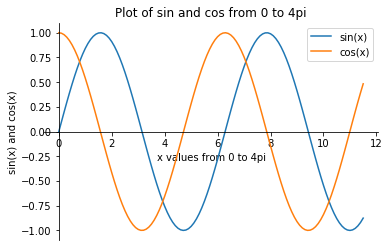

In [6]:
import matplotlib.pyplot as plt
import numpy as np


#Set the x-axis range
x = np.arange(0,4*np.pi-1,0.1)   
y = np.sin(x)
z = np.cos(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#Spine placement data centered
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#Plot our functions f(x)=sin(x),f(x)=cos(x)
plt.plot(x,y,x,z)
plt.xlabel('x values from 0 to 4pi')
plt.ylabel('sin(x) and cos(x)')
plt.title('Plot of sin and cos from 0 to 4pi')
plt.legend(['sin(x)', 'cos(x)'])    
plt.show()



It's a good thing we're not inclined to throw in the towel because of one little obstacle! Let's think about the values of $\frac{f(x+\epsilon)-f(x)}{(x+\epsilon)-x}$ when $x=\frac{\pi}{2}$. We can see that this is a turning point on the curve, i.e. a point where the slope of the curve is $0$. So what happens to $\frac{\Delta{f(x)}}{\Delta{x}}$ as $\epsilon\to0$? 

In [2]:
import pandas as pd
import operator
from IPython.display import display


rowLabel = '$\scriptsize{\\frac{f(x+\\epsilon)-f(x)}{(x+\\epsilon)-x}}$'
def colLabel(v): 
    return f'$\\epsilon={v}$'
data = {}
def f(x): 
    def g(dx):
        data[dx] = (np.sin(x+dx)-np.sin(x))/dx
    return np.vectorize(g)
vecFunc = f(np.pi/2.0)
dxDomain = np.linspace(np.power(10.0,-1.0),np.power(10.0,-8.0),num=6)
vecFunc(dxDomain[::-1])
df = pd.DataFrame(data,index=[f'${rowLabel}$'])
df.columns = map(colLabel,df.columns)
columns = df.columns.tolist()
columns = columns[::-1]
data_frame = df[columns]
display(data_frame)


,$\epsilon=0.1$,$\epsilon=0.080000002$,$\epsilon=0.060000004$,$\epsilon=0.040000006000000005$,$\epsilon=0.020000008$,$\epsilon=1e-08$
$$\scriptsize{\frac{f(x+\epsilon)-f(x)}{(x+\epsilon)-x}}$$,-0.049958,-0.039979,-0.029991,-0.019997,-0.01,0.0


As we can see above, $\lim_{\epsilon\to0}\frac{\Delta{f(x)}}{\Delta{x}}$ is clearly $0$. What this tells us is that though we could not mathematically evaluate $\lim_{\epsilon\to0}\frac{\Delta{f(x)}}{\Delta{x}}$, we can see this quantity tends to $0$ in the limit. But how can we prove that such a limit exists and better yet, how can we come up with an expression for it?

Let's take a step back and look at the behavior of the following: $\lim_{x\to0}\frac{sin(x)}{x}$

In [3]:
import pandas as pd
import operator
from IPython.display import display
col0 = '$x$'
col1 = '$sin(x)$'
col2 = '$\\frac{sin(x)}{x}$'
x = np.linspace(0.5,0.0001,num=6).T
df = pd.DataFrame(x,columns=[col0])
df[col1] = df.apply(lambda row: np.sin(row[col0]), axis=1)
df[col2] = df.apply(lambda row: np.sin(row[col1])/row[col0], axis=1)

display(df)

,$x$,$sin(x)$,$\frac{sin(x)}{x}$
0,0.50000,0.479426,0.922539
1,0.40002,0.389437,0.949121
2,0.30004,0.295558,0.970784
3,0.20006,0.198728,0.986817
4,0.10008,0.099913,0.996671
5,0.00010,0.000100,1.000000


Again, we can see that the limit in question is $1$. Let's try to prove that this is actually the case!

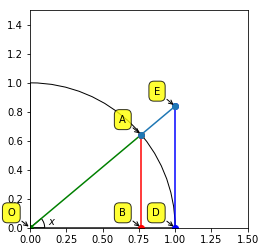

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def labelPoint(label,x,y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-15, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.8),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
#Angle EOD
x_deg = 40
x_rad = 2*np.pi*x_deg/360.0
#Angle
ax1.add_patch(
    patches.Wedge(
        (0., 0.),     # (x,y)
        0.1,            # radius
        0,             # theta1 (in degrees)
        x_deg,             # theta2
        fill=False      # remove background

    ))
ax1.text(0.12,0.025,'$x$')
#Circle
ax1.add_patch(
    patches.Wedge(
        (0., 0.),     # (x,y)
        1,            # radius
        0,             # theta1 (in degrees)
        90,             # theta2
        fill=False      # remove background

    ))
ax1.set_xlim([0, 1.5])
ax1.set_ylim([0, 1.5])
#OA
x3, y3 = [0.0, np.cos(x_rad)], [0.0,np.sin(x_rad)]
plt.plot(x3,y3,color='g',marker='o')
#ED
x2, y2 = [1.0, 1.0], [0.0,np.tan(x_rad)]
plt.plot(x2, y2, color='b',marker='o')
#AB
x0, y0 = [np.cos(x_rad), np.cos(x_rad)], [0.0,np.sin(x_rad)]
plt.plot(x0, y0, color='r',marker='o')
#AE
x1, y1 = [np.cos(x_rad), 1.0], [np.sin(x_rad), np.tan(x_rad)]
plt.plot(x1, y1, marker = 'o')
#Labels
labelPoint('B',x0[0],y0[0])
labelPoint('A',x0[1],y0[1])
labelPoint('E',x1[1],y1[1])
labelPoint('D',x2[0],y2[0])
labelPoint('O',0,0)


$\newcommand\ddfrac[2]{\frac{\displaystyle #1}{\displaystyle #2}}$

Let's consider a circle with radius $1$ and center $O$, with $AD$ being the arc of the cirle intercepted by the angle $x$. At $A$ we drop a peprpendicular to the side $OD$ of the angle, and at $D$ we errect a perpendicular to the side $OD$. This perpendicular will meet the side $OA$ at some point, $E$.

We can see from above that that:
\begin{equation}
area\ OBA < area\ of\ sector\ ODA < area\ ODE \tag{1}
\end{equation}

But
\begin{equation}
area\ OBA = \tfrac{1}{2} OB \cdot BA = \tfrac{1}{2} cos(x) \cdot sin(x) \tag{2}
\end{equation}

We also know that the area of the cirle as a whole is $\pi\times{radius}^{2}$, and that the area of of the sector $ODA$ is in the same proportion to the total area of the cirle as the angle $x$ is to $2\pi$. 

Put differently:
\begin{equation}
area\ of\ the\ sector\ ODA = \frac{x}{2\pi}*\pi*(1^{2})=\frac{x}{2} \tag{3}
\end{equation}

Finally,
\begin{equation}
area\ ODE = \tfrac{1}{2} OD \cdot ED = \tfrac{1}{2} tan(x) = \frac{1}{2} \frac{sin(x)}{cos(x)} \tag{4}
\end{equation}

Substituting the values from $(2),(3)$ and $(4)$ into $(1)$ gives us:
\begin{equation}
\tfrac{1}{2} cos(x) \cdot sin(x) = \frac{x}{2} = \frac{1}{2} \frac{sin(x)}{cos(x)} \tag{5}
\end{equation}

Dividing $(5)$ by $sin(x)/2$ gives us:
\begin{equation}
cos(x) < \frac{x}{sin(x)} < \frac{1}{cos(x)} \tag{6}
\end{equation}

As show in the figure above, as $x$ approaches $0$, $cos(x)$ approaches 1. From $(6)$ we can see that $\ddfrac{x}{sin(x)}$ always lies between two quantities: $cos(x)$ and $\ddfrac{1}{cos(x)}$, both of which  approach $1$ as $x$ approaches $0$.

Therefore we can say:

$$\lim_{x\to0}\frac{x}{sin(x)}=1$$

And because the limit is $1$, the reciprocal also approaches $1$:
\begin{equation}
\lim_{x\to0}\frac{sin(x)}{x}=1 \tag{7}
\end{equation}

So far we've only considered $\lim_{x\to0}\ddfrac{x}{sin(x)}$ as $x$ approaches $0$ through positive values. When $x$ is negative we can use the fact that:

\begin{equation}
\ddfrac{sin(x)}{x}=\ddfrac{sin(-x)}{-x} \tag{8}
\end{equation}

because $-sin(x)=sin(-x)$. In addition to this, when $x$ is negative, then $-x$ is positive. Because the right side of $(8)$ deals positive values of $x$, and the fraction approaches $1$ as $x$ approaches $0$ then the left side of $8$ must also approach $1$.

There is one final limit that will come in handy a bit later on:

And because the limit is $1$, the reciprocal also approaches $1$:
\begin{equation}
\lim_{x\to0}\frac{1-cos(x)}{x}=1 \tag{9}
\end{equation}

The problem with evaluating this limit, is a very familiar one - both the numerator and the denominator approach 0! We can however evaluate it using the following trigonometric identity:
\begin{equation}
sin\Big(\ddfrac{x}{2}\Big)=\sqrt{\ddfrac{1-cos(x)}{x}} \tag{10}
\end{equation}

Which gives us:
$$1-cos(x) = 2sin^{2}\Big(\ddfrac{x}{2}\Big)$$


Subsitiuting this value in (9) we obtain:
$$\lim_{x\to0}\frac{2sin^{2}\Big(\ddfrac{x}{2}\Big)}{x}$$

We can rewrite the result in $(11)$ as:

$$\lim_{x\to0}sin\Big(\ddfrac{x}{2}\Big)\frac{sin\Big(\ddfrac{x}{2}\Big)}{\frac{x}{2}}$$

If we set $y=\ddfrac{x}{2}$, it becomes clear that we are trying to find the limit of the product of $sin(y)$ and $\ddfrac{sin(y)}{y}$ as y approaches 0. As we know (or don't know!), the limit of a product of two functions is simply the product of the limits of the functions. As we showed above, $\ddfrac{sin(y)}{y}$ approaches 1 as $y$ approaches $0$ and $sin(y)$ approaches $0$. Therefore, the product of the limits is $0$. This gives us:

\begin{equation}
\lim_{x\to0}\ddfrac{1-cos(x)}{x} = 0 \tag{11}
\end{equation}

# Getting back to business

Phew, so we went on a bit of a detour just then. Let's take another crack at finding the derivative of $y=sin(x)$! We're going to use the same approach we tried earlier. If $x_{0}$ is the value of $x$ that we want the derivative of $sin(x)$ at. We have:

$$y_{0}=sin(x_{0})$$

If $x_{0}$ changes value by a small amount, say $\Delta{x}$, then:
$$y_{0}+\Delta{y}=sin(x_{0}+\Delta{x})$$

Rearranging this expression produces:

$$\frac{\Delta{y}}{\Delta{x}}=\frac{sin(x_{0}+\Delta{x})-sin(x_{0})}{\Delta{x}}$$

Now we still can't evaluate the limit of this quantity as $\Delta{x}$ approaches $0$ simply by inspecting the expression. Let's try transforming it into a form that is a bit clearer. We could try using the identity

$$sin(A+B)= sin(A) \times cos(B) + cos(A) \times sin(B)$$

This gives us:

$$\ddfrac{\Delta{y}}{\Delta{x}}=\frac{sin(x_{0})cos(\Delta{x})+cos(x_{0})sin(\Delta{x})-sin(x_{0})}{\Delta{x}}$$

Again,this doesn't help us to evaluate the limit, so let's try collecting all the $sin(x_{0})$ and splitting out the fraction into two parts. 

\begin{equation}
\ddfrac{\Delta{y}}{\Delta{x}}= sin(x_{0}) \cdot \frac{cos(\Delta{x})-1}{\Delta{x}}+cos(x_{0})\frac{sin(\Delta{x})} {\Delta{x}} \tag{12}
\end{equation}

To find the derivative, $\ddfrac{dy}{dx}$, we need to find the limit of $\ddfrac{\Delta{y}}{\Delta{x}}$ as $\Delta{x}$ approaches $0$. What we have on the right side in $(12)$ is the sum of two quantities, and because the limit of a sum of two quantities is the sum of the limits we can tackle the limit of each of the quantities seperately. 

First let's look at:
\begin{equation}
sin(x_{0}) \cdot \ddfrac{cos(\Delta{x})-1}{\Delta{x}} \tag{13}
\end{equation}

$sin(x_{0})$ is a constant, which means that the limit of $(13)$ is $sin(x_{0})$ multiplied by the limit of $\ddfrac{cos(\Delta{x})-1}{\Delta{x}}$. We can rewrite $\ddfrac{cos(\Delta{x})-1}{\Delta{x}}$ as $-1\cdot\ddfrac{1-cos(\Delta{x})}{\Delta{x}}$. As we showed in $(11)$, the limit of this quantity is $0$, and therefore the limit of $sin(x_{0}) \cdot \ddfrac{cos(\Delta{x})-1}{\Delta{x}}$ is $0$.

Next up is the second fraction:

\begin{equation}
cos(x_{0})\ddfrac{sin(\Delta{x})}{\Delta{x}} \tag{14}
\end{equation}

Again, $cos(x_{0})$ is a constant here, and therefore the limit of this term is $cos(x_{0})$ multiplied by the limit of $\ddfrac{sin(\Delta{x})}{\Delta{x}}$. From $(7)$, we can see that the limit of $\ddfrac{sin(\Delta{x})}{\Delta{x}}$ is simply $cos(x_{0})$.

Finally, considering $(13) and (14)$ we have:

$$\frac{dy}{dx}=lim_{\Delta{x}\to0}\frac{\Delta{y}}{\Delta{x}}=cos{x_{0}}$$.

This result is true for all values of $x_{0}$ and you know what that means - it means that we just shown that if we have a function $y=sin(x)$ then the derived value (or the derivative of that function) is:

\begin{equation}
\frac{dy}{dx}=cos{x} \tag{15}
\end{equation}


# Wrapping up

Thanks for taking the time to read this article. I'd love to hear any feedback you might have, so feel free to get in touch using the comments section below. In my next article I'll be talking about Markov chains, so stay tuned!